# Telecom X – Parte 2: Predicción de Cancelación (Churn)

# 1. Preparación de los datos

### 1.1 Extracción del Archivo Tratado

In [1]:
import pandas as pd

df = pd.read_csv('telecom_churn_cleaned.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### 1.2 Atención sobre el archivo

Utilizamos el mismo archivo que limpiamos y organizamos en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

### 1.3 Eliminación de Columnas Irrelevantes

In [ ]:
df = df.drop(['customerID', 'Cuentas_Diarias'], axis=1)
df.shape

(7043, 20)

In [3]:
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


### 1.4 Encoding

In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,True,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,True,...,False,False,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True


In [5]:
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,True,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,True,...,False,False,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True


### 1.5 Verificación de la Proporción de Cancelación (Churn)

In [7]:
df_encoded['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

### 1.6 Balanceo de Clases (opcional)

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribución de clases con SMOTE:")
print(y_smote.value_counts(normalize=True))

# RandomUnderSampler (Undersampling)
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("\nDistribución de clases con RandomUnderSampler:")
print(y_rus.value_counts(normalize=True))

Distribución de clases con SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribución de clases con RandomUnderSampler:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


### 1.7 Normalización o Estandarización (si es necesario)

In [10]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Estandarizar los datos originales
X_scaled = scaler.fit_transform(X)

# Estandarizar los datos de SMOTE
X_smote_scaled = scaler.fit_transform(X_smote)

# Estandarizar los datos de RandomUnderSampler
X_rus_scaled = scaler.fit_transform(X_rus)

In [12]:
import numpy as np
print("Media de las primeras 5 columnas:", np.mean(X_scaled[:, :5], axis=0))
print("Desviación estándar de las primeras 5 columnas:", np.std(X_scaled[:, :5],
     axis=0))

Media de las primeras 5 columnas: [-4.74165960e-17  1.23081377e-16  1.07948421e-16 -2.82481849e-17
  7.26381897e-17]
Desviación estándar de las primeras 5 columnas: [1. 1. 1. 1. 1.]


# 2. Correlación y selección de variables

### 2.1 Análisis de Correlación

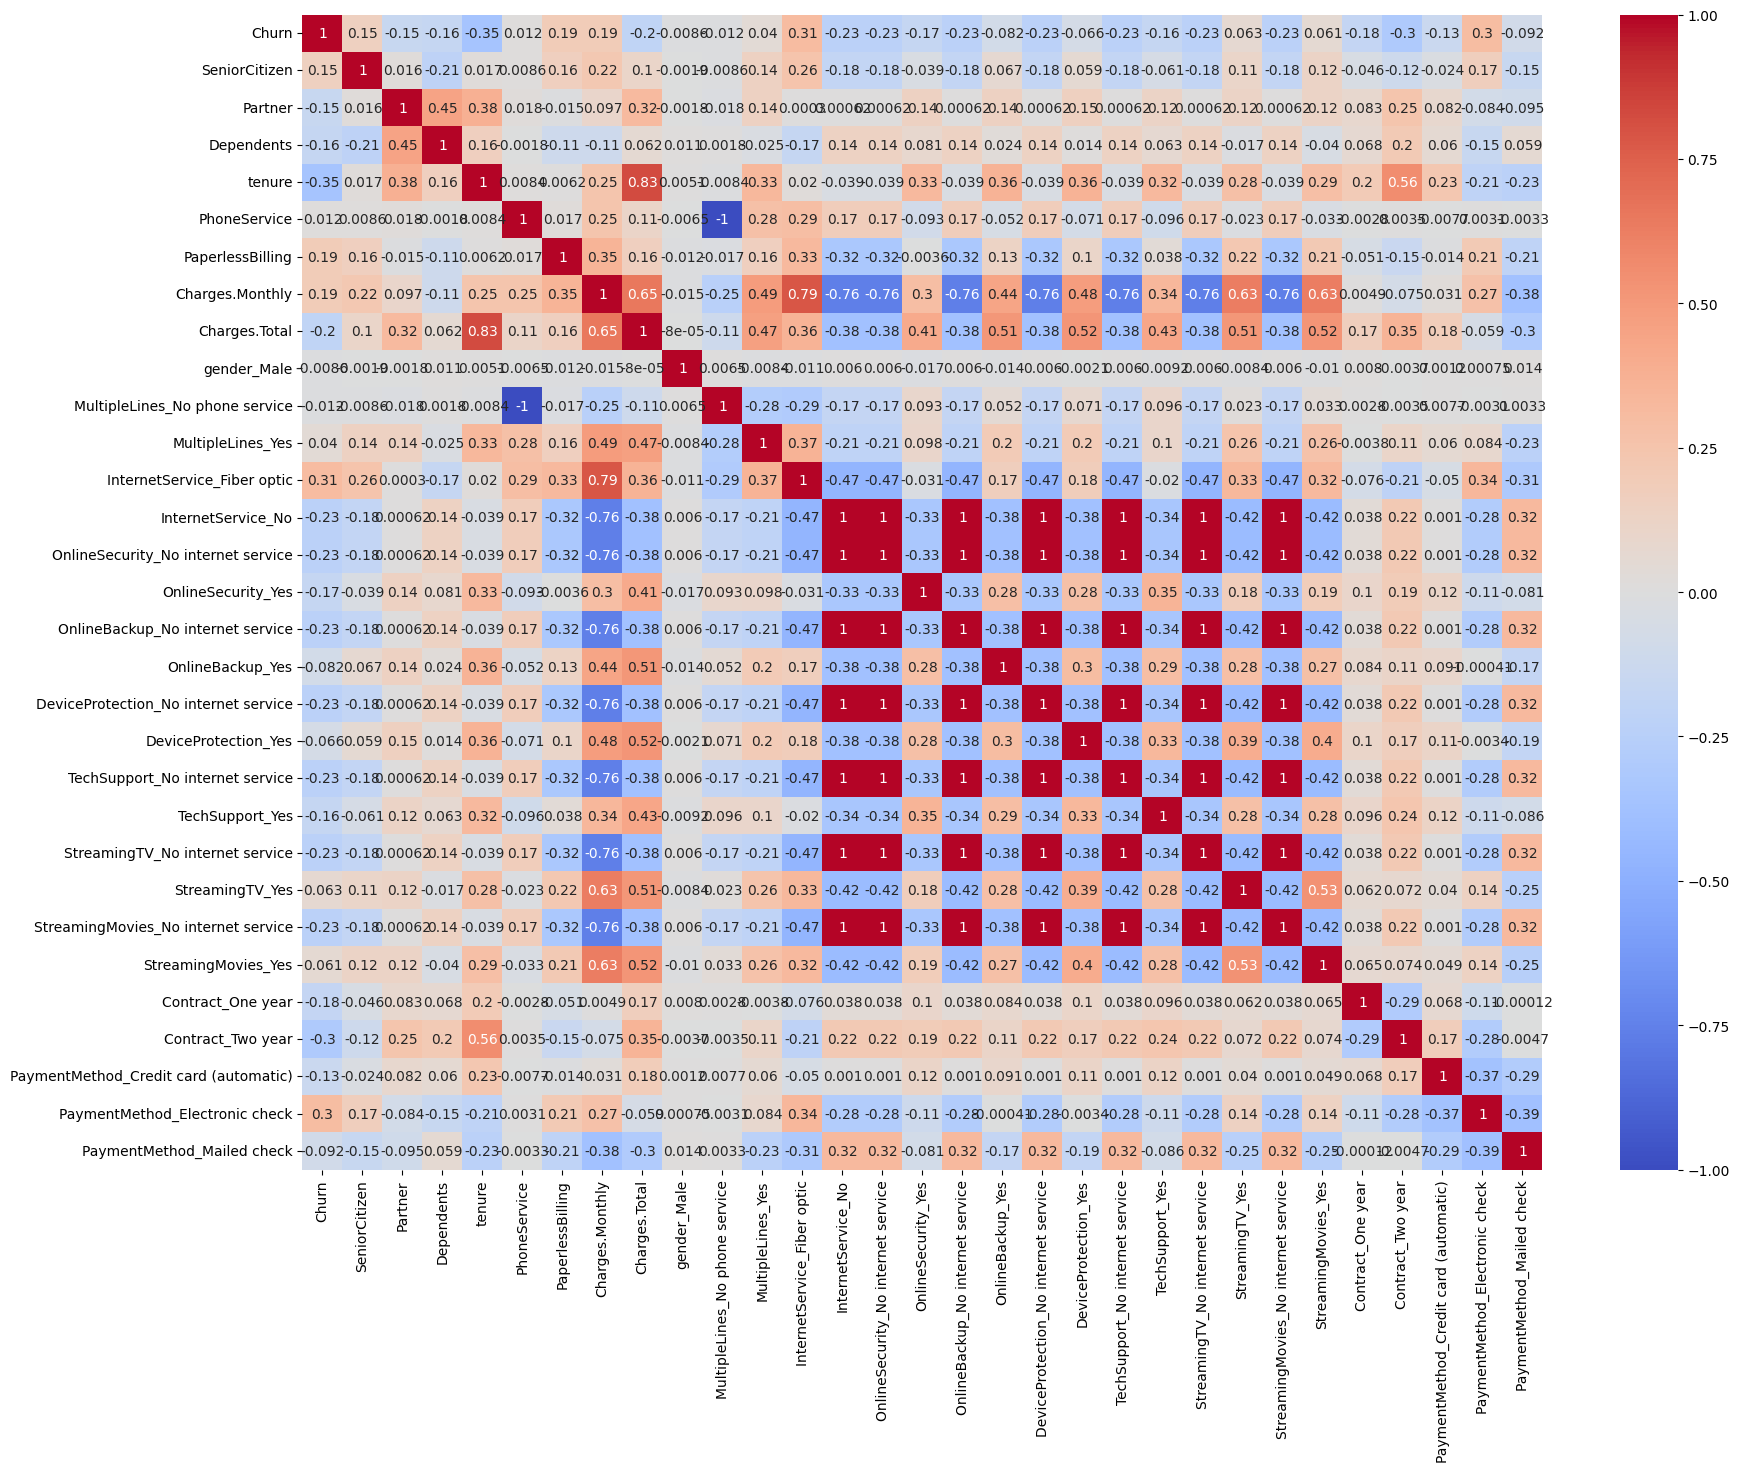

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

### 2.2 Análisis Dirigido

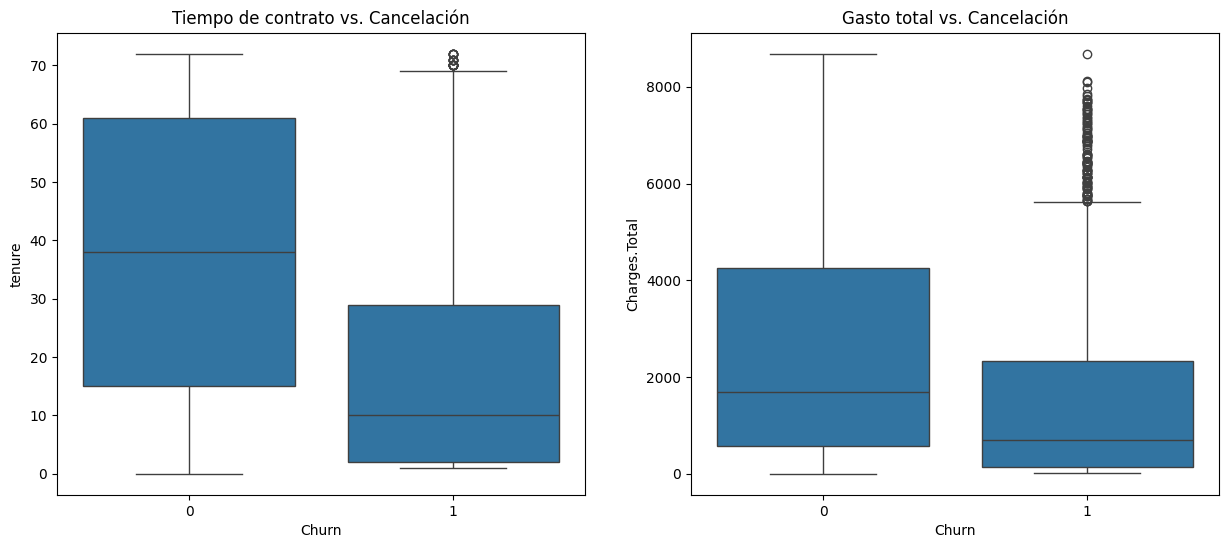

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Churn', y='tenure', data=df_encoded, ax=axes[0])
axes[0].set_title('Tiempo de contrato vs. Cancelación')

sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded, ax=axes[1])
axes[1].set_title('Gasto total vs. Cancelación')

plt.show()